Text(0, 0.5, 'g_e (units of g_L)')

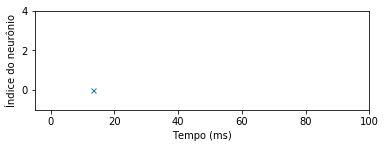

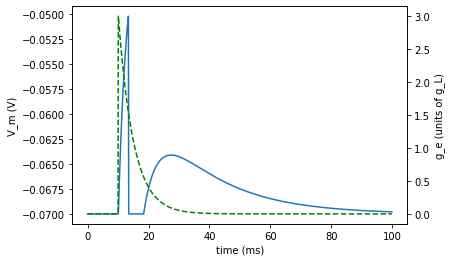

In [28]:
#Lógica E baseado em https://www.western-neuralnets.ca/week3/lab3.html
# 1 neuronio fire e outro fire

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms   # time constant
g_L    = 10*nS   # leak conductance
E_l    = -70*mV  # leak reversal potential
E_e    = 0*mV    # excitatory reversal potential
tau_e  = 5*ms    # excitatory synaptic time constant
Vr     = E_l     # reset potential
Vth    = -50*mV  # spike threshold
Vs     = 20*mV   # spiking potential
w_e    = 3       # excitatory synaptic weight (units of g_L)
# com peso 3 dispara (com apenas 1 pulso). Menos que isso não

# model equations
eqs = '''
dv/dt = ( E_l - v + g_e*(E_e-v) ) / taum  : volt (unless refractory)
dg_e/dt = -g_e/tau_e  : 1  # excitatory conductance (dimensionless units)
'''

# create neuron
neurons = NeuronGroup(1, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
neurons.v = E_l

# create inputs
indices = array([0]); times = array([10])*ms
input = SpikeGeneratorGroup(1, indices, times )

# create connections
#S = Synapses(input, neurons, 'w: 1', on_pre='g_e += w_e' )
S = Synapses(input, neurons, on_pre='g_e += w_e' )
S.connect( i=0, j=0 );

# record model state
M = StateMonitor(neurons, ('v','g_e'), record=True )
spike_mon = SpikeMonitor(neurons)

# run simulation
run(100*ms)

# Raster plot
subplot(211)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 100)
ylim(-1, 4)

# plot output
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot( M.t/ms, M.v[0] ); ax2.plot( M.t/ms, M.g_e[0], 'g--' );
ax1.set_xlabel('time (ms)'); ax1.set_ylabel('V_m (V)'); ax2.set_ylabel('g_e (units of g_L)')



Text(0, 0.5, 'g_e (units of g_L)')

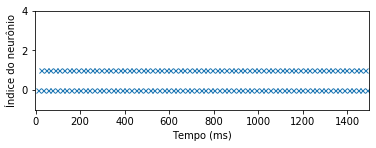

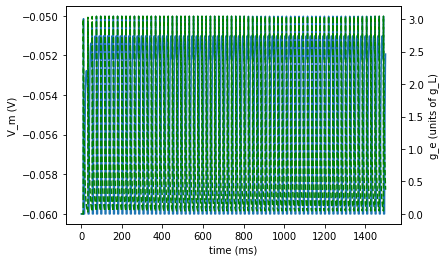

In [14]:
#Lógica E baseado em https://www.western-neuralnets.ca/week3/lab3.html
# 1 neuronio fire e loop. OK

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms   # time constant
#g_L    = 10*nS   # leak conductance
E_l    = -60*mV  # leak reversal potential
E_e    = 0*mV    # excitatory reversal potential
tau_e  = 5*ms    # excitatory synaptic time constant
Vr     = E_l     # reset potential
Vth    = -50*mV  # spike threshold
#Vs     = 20*mV   # spiking potential
w_e    = 3       # excitatory synaptic weight (units of g_L)
# com peso 3 dispara (com apenas 1 pulso). 

# model equations
eqs = '''
dv/dt = ( E_l - v + g_e*(E_e-v) ) / taum  : volt (unless refractory)
dg_e/dt = -g_e/tau_e  : 1  # excitatory conductance (dimensionless units)
'''

# create neuron
neurons = NeuronGroup(2, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
neurons.v = E_l

# create inputs
indices = array([0]); times = array([10])*ms
input = SpikeGeneratorGroup(1, indices, times )

# create connections
#S = Synapses(input, neurons, 'w: 1', on_pre='g_e += w_e' )
Stimulus = Synapses(input, neurons, on_pre='g_e += w_e' )
Stimulus.connect( i=0, j=0 );

S = Synapses(neurons, neurons, on_pre='g_e += w_e', delay = 10*ms )
S.connect(i=0, j=1);
S.connect(i=1, j=0);


# record model state
M = StateMonitor(neurons, ('v','g_e'), record=True )
spike_mon = SpikeMonitor(neurons)

# run simulation
run(1500*ms)

# Raster plot
subplot(211)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 1500)
ylim(-1, 4)

# plot output
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot( M.t/ms, M.v[0] ); ax2.plot( M.t/ms, M.g_e[0], 'g--' );
ax1.set_xlabel('time (ms)'); ax1.set_ylabel('V_m (V)'); ax2.set_ylabel('g_e (units of g_L)')



Text(0, 0.5, 'g_e (units of g_L)')

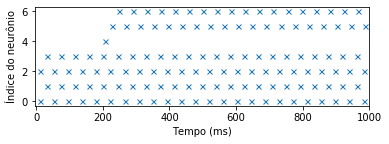

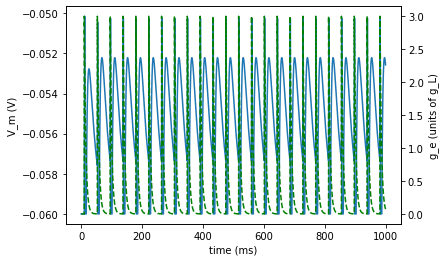

In [34]:
#Lógica E baseado em https://www.western-neuralnets.ca/week3/lab3.html
# 1 neuronio fire (stimulus) e 2 loop. AND OK

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms   # time constant
#g_L    = 10*nS  # leak conductance
E_l    = -60*mV  # leak reversal potential
E_e    = 0*mV    # excitatory reversal potential
tau_e  = 5*ms    # excitatory synaptic time constant
Vr     = E_l     # reset potential
Vth    = -50*mV  # spike threshold
#Vs     = 20*mV  # spiking potential
w_e    = 3       # excitatory synaptic weight (units of g_L)
                 # com peso 3 dispara (com apenas 1 pulso). 
w_e_AND = .4     #com peso .4 funciona como AND de 3 entradas (clock + 2)       
    
    
# model equations
eqs = '''
dv/dt = ( E_l - v + g_e*(E_e-v) ) / taum  : volt (unless refractory)
dg_e/dt = -g_e/tau_e  : 1  # excitatory conductance (dimensionless units)
'''

# create neuron
neurons = NeuronGroup(7, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
neurons.v = E_l

# create stimulus
indices = array([0, 1]); times = array([10, 200])*ms
input = SpikeGeneratorGroup(2, indices, times )

# create connections
#S = Synapses(input, neurons, 'w: 1', on_pre='g_e += w_e' )
Stimulus = Synapses(input, neurons, on_pre='g_e += w_e' )
Stimulus.connect(i=0, j=[0, 2]);

Stimulus_AND = Synapses(input, neurons, on_pre='g_e += w_e_AND' )
Stimulus_AND.connect(i=1, j=4);


S = Synapses(neurons, neurons, on_pre='g_e += w_e', delay = 20*ms )
S.connect(i=0, j=1); # clock
S.connect(i=1, j=0);
S.connect(i=2, j=3); # Sa
S.connect(i=3, j=2);
S.connect(i=5, j=6); # Sb
S.connect(i=6, j=5);

S.connect(i=4, j=5);

S_AND = Synapses(neurons, neurons, on_pre='g_e += w_e_AND', delay = 20*ms )
S_AND.connect(i=0, j=4);
S_AND.connect(i=2, j=4);

# record model state
M = StateMonitor(neurons, ('v','g_e'), record=True )
spike_mon = SpikeMonitor(neurons)

# run simulation
run(1000*ms)

# Raster plot
subplot(211)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 1000)
#ylim(-1, 4)

# plot output
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot( M.t/ms, M.v[0] ); ax2.plot( M.t/ms, M.g_e[0], 'g--' );
ax1.set_xlabel('time (ms)'); ax1.set_ylabel('V_m (V)'); ax2.set_ylabel('g_e (units of g_L)')

Text(0, 0.5, 'g_e (units of g_L)')

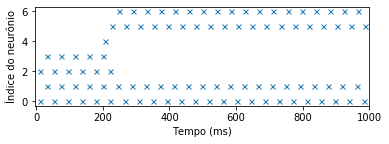

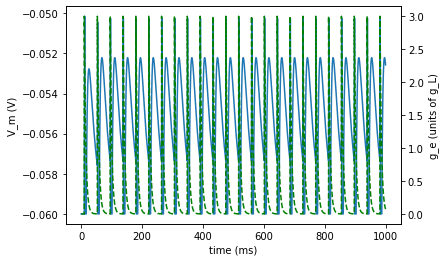

In [41]:
#Lógica E baseado em https://www.western-neuralnets.ca/week3/lab3.html
# 1 neuronio fire (stimulus) e 2 loop. AND OK
# tentando fazer inhibitory

from brian2 import *
import matplotlib.pyplot as plt

start_scope() # clears the workspace of previous Brian objects

# parameters and model equations
taum   = 20*ms   # time constant
#g_L    = 10*nS  # leak conductance
E_l    = -60*mV  # leak reversal potential
E_e    = 0*mV    # excitatory reversal potential
tau_e  = 5*ms    # excitatory synaptic time constant
E_i    = -80*mV         # inhibitory reversal potential
tau_i  = 10*ms          # inhibitory synaptic time constant
Vr     = E_l     # reset potential
Vth    = -50*mV  # spike threshold
#Vs     = 20*mV  # spiking potential
w_e    = 3       # excitatory synaptic weight (units of g_L)
                 # com peso 3 dispara (com apenas 1 pulso). 
w_e_AND = .4     #com peso .4 funciona como AND de 3 entradas (clock + 2)       
w_i    = 10              # inhibitory synaptic weight    
    
# model equations
eqs = '''
dv/dt = ( E_l - v + g_e*(E_e-v) + g_i*(E_i-v) ) / taum  : volt (unless refractory)
dg_e/dt = -g_e/tau_e  : 1  # excitatory conductance (dimensionless units)
dg_i/dt = -g_i/tau_i  : 1  # inhibitory conductance (dimensionless units)
'''

# create neuron
neurons = NeuronGroup(7, model=eqs, threshold='v>Vth', reset='v=Vr', refractory='5*ms', method='euler' )

# initialize neuron
neurons.v = E_l

# create stimulus
indices = array([0, 1]); times = array([10, 200])*ms
input = SpikeGeneratorGroup(2, indices, times )

# create excitatory connections
Stimulus = Synapses(input, neurons, on_pre='g_e += w_e' )
Stimulus.connect(i=0, j=[0, 2]);

Stimulus_AND = Synapses(input, neurons, on_pre='g_e += w_e_AND' )
Stimulus_AND.connect(i=1, j=4);

S = Synapses(neurons, neurons, on_pre='g_e += w_e', delay = 20*ms )
S.connect(i=0, j=1); # clock
S.connect(i=1, j=0);
S.connect(i=2, j=3); # Sa
S.connect(i=3, j=2);
S.connect(i=5, j=6); # Sb
S.connect(i=6, j=5);

S.connect(i=4, j=5);

S_AND = Synapses(neurons, neurons, on_pre='g_e += w_e_AND', delay = 20*ms )
S_AND.connect(i=0, j=4);
S_AND.connect(i=2, j=4);

# create inhibitory
synI = Synapses(neurons, neurons, on_pre='g_i += w_i', delay = 20*ms )
synI.connect(i=4, j=2) 
synI.connect(i=4, j=3) 

# record model state
M = StateMonitor(neurons, ('v','g_e'), record=True )
spike_mon = SpikeMonitor(neurons)

# run simulation
run(1000*ms)

# Raster plot
subplot(211)
plot(spike_mon.t/ms, spike_mon.i, 'x', markersize = 5)
xlabel('Tempo (ms)')
ylabel('Índice do neurônio')
xlim(-5, 1000)
#ylim(-1, 4)

# plot output
fig, ax1 = plt.subplots(); ax2 = ax1.twinx()
ax1.plot( M.t/ms, M.v[0] ); ax2.plot( M.t/ms, M.g_e[0], 'g--' );
ax1.set_xlabel('time (ms)'); ax1.set_ylabel('V_m (V)'); ax2.set_ylabel('g_e (units of g_L)')